<a href="https://colab.research.google.com/github/Samuel-jesusboy/Machine_Learning-Competitions/blob/main/Telecoms_churn/Telecom_Churn_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
from scipy import stats

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    roc_curve, roc_auc_score, precision_recall_fscore_support,
    precision_recall_curve, average_precision_score, confusion_matrix,
    accuracy_score
)
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time
import seaborn as sns
#import scikitplot as skplt

# Statistical modeling
import statsmodels.api as sm

# Miscellaneous
from IPython.display import display_html

# Setting seed and configurations
np.random.seed(852)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the data and display the random sample of 5
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2600,2262-SLNVK,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,70.10,70.1,No
2886,3170-GWYKC,Female,0,No,No,60,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.95,6236.75,No
782,0285-INHLN,Male,0,Yes,Yes,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),54.75,1510.3,No
773,5842-POCOP,Female,0,Yes,No,5,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,88.90,454.15,Yes
6535,0520-FDVVT,Male,0,No,No,35,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.35,3626.1,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Checking and correcting data inconsistency

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check and display rows where "TotalCharges" does not start with a digit
check_total_charges = df["TotalCharges"].str.contains(r"^(?!.\d)", regex=True)
display(df[check_total_charges])

# Convert "TotalCharges" to numeric, replacing errors with NaN and filling NaN with 0
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

# Convert "SeniorCitizen" to "Yes" or "No" without using np.where
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool).map({True: "Yes", False: "No"})

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Exploratory Data Analysis

<h3> Target variable</h3>

The objective is to predict if the client churned from the company in the previous month. From the Target we can see this is an unbalanced binary classification problem as expected:
* Churn: No   - 72.4%
* Churn: Yes  - 27.6%

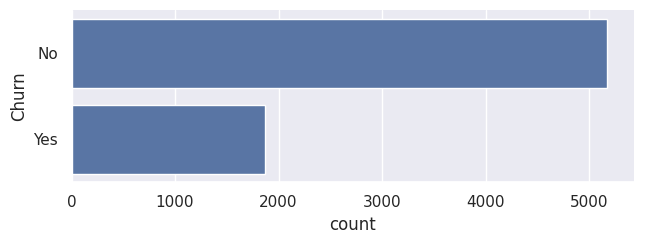

In [ ]:
# Create a horizontal bar plot to visualize the distribution of 'Churn'
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

<h2>Numerical features</h2>

There are three numerical columns: tenure, monthly charges and total charges. The distribution can be estimated using the seaborn kdeplot function.

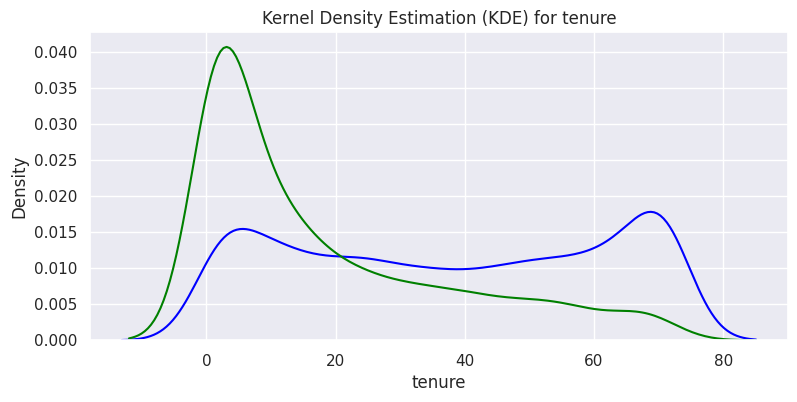

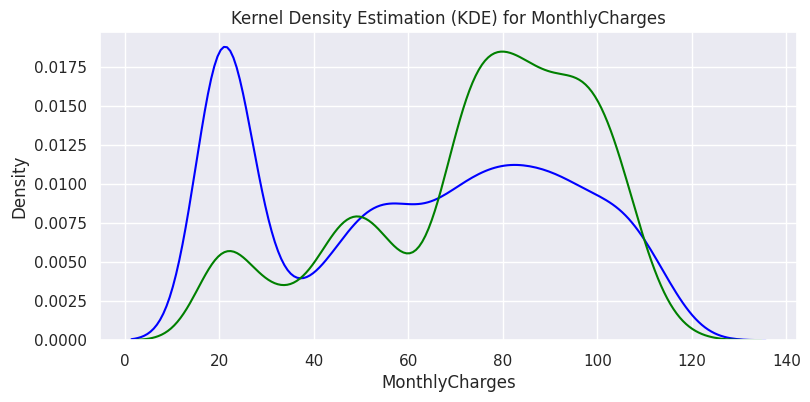

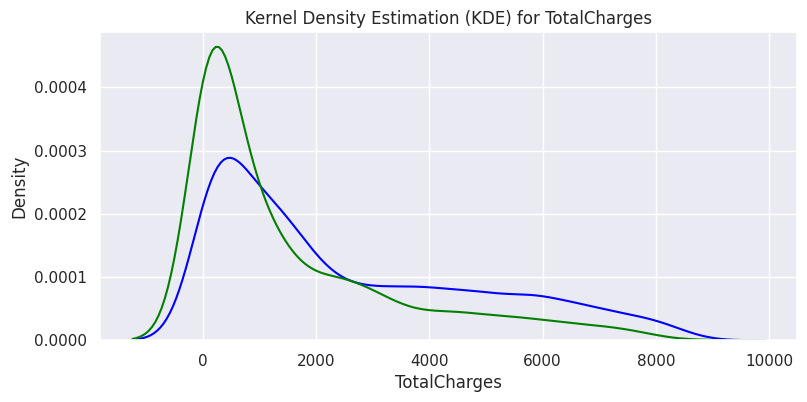

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("Kernel Density Estimation (KDE) for {}".format(feature))

    # KDE plot for 'Churn: No' in blue color
    sns.kdeplot(df.loc[df['Churn'] == 'No', feature].dropna(), color='blue', label='Churn: No')

    # KDE plot for 'Churn: Yes' in green color
    sns.kdeplot(df.loc[df['Churn'] == 'Yes', feature].dropna(), color='green', label='Churn: Yes')

# Example usage for selected features
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

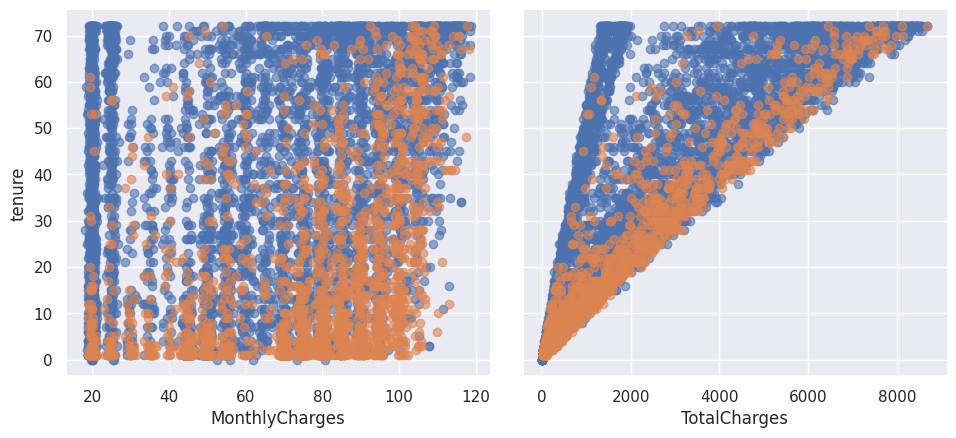

In [ ]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

Analyzing the visualizations above reveals insightful patterns:
* Clients with shorter tenure are more prone to churn, indicating that recent clients exhibit a higher likelihood of discontinuation.
* The scatter plots further illustrate discernible boundaries, reinforcing the potential significance of features such as Tenure and MonthlyCharges in predicting churn.
* Higher MonthlyCharges correspond to an increased likelihood of churn, suggesting that pricing may be a key factor influencing client retention.

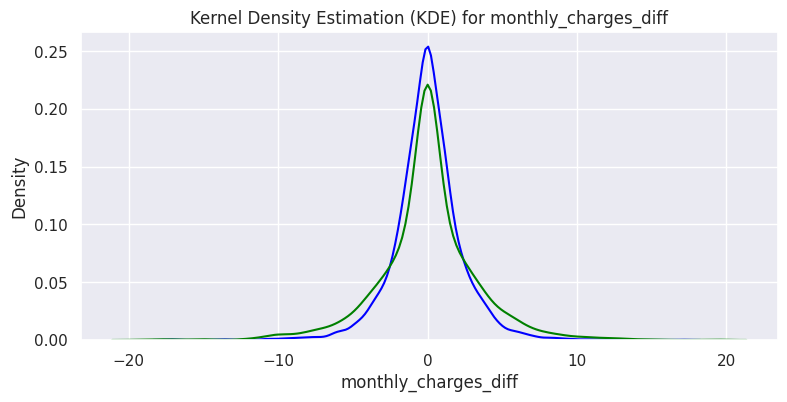

In [ ]:
# Calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

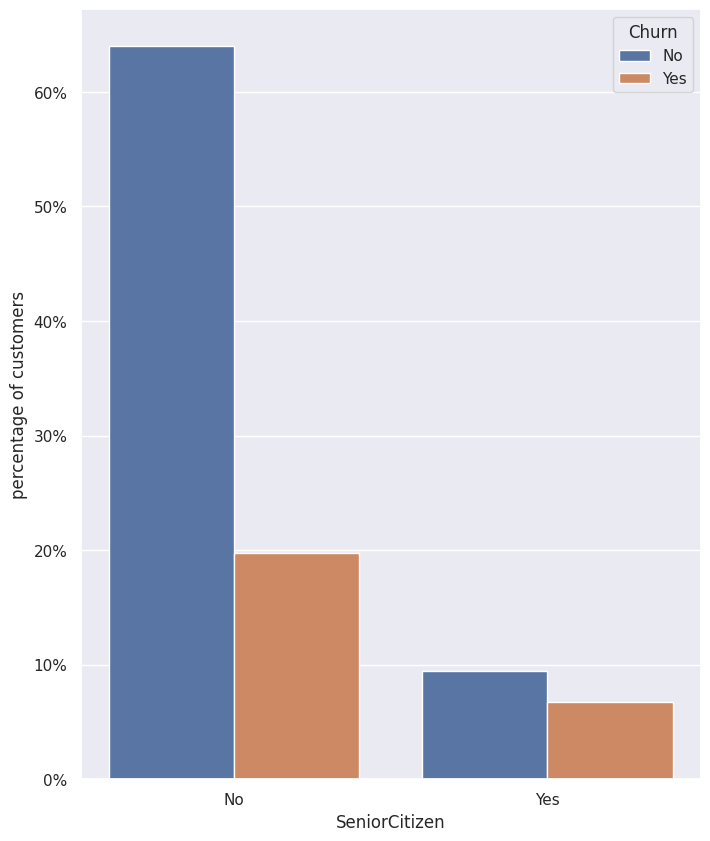

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

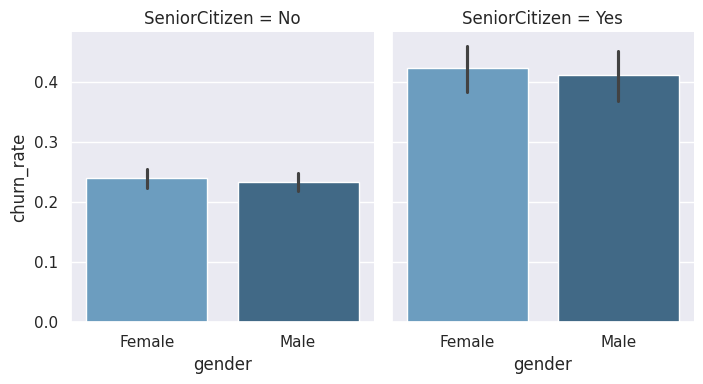

In [ ]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

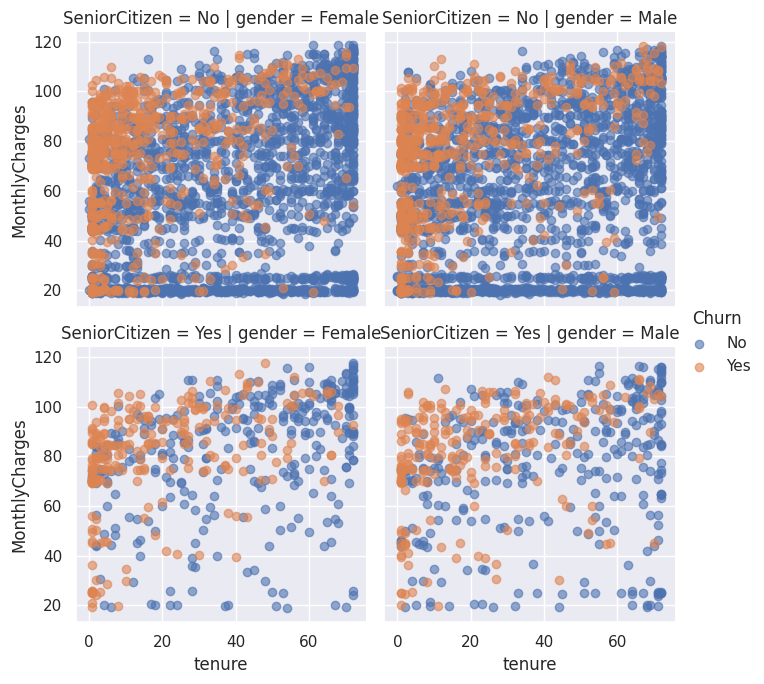

In [ ]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

* Gender alone does not serve as a reliable indicator of churn.
* Although Senior Citizens account for only 16% of customers, their churn rate is notably higher at 42%, compared to 23% for non-senior customers.
* Upon closer examination, there appears to be no distinctive relationships between these categorical values and the primary numerical features in our analysis.

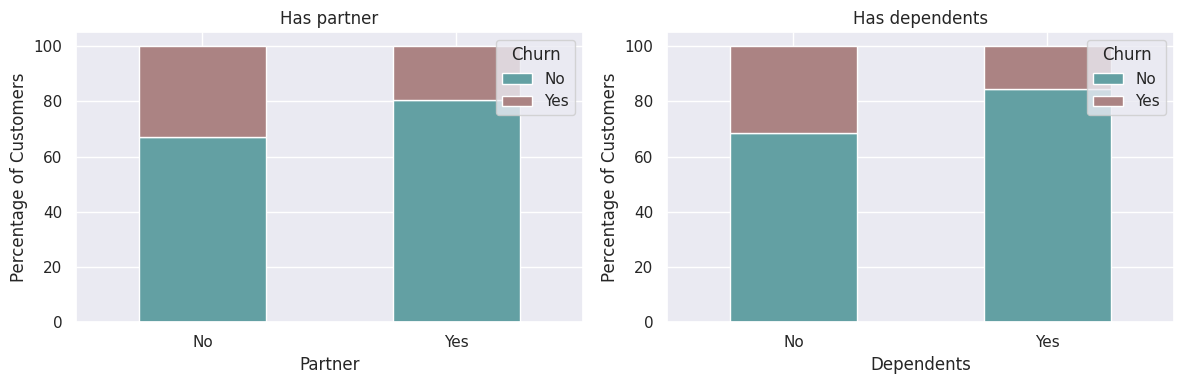

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for ax, column in zip(axes, ['Partner', 'Dependents']):
    ax.set_title(f"Has {column.lower()}")
    axis_y = "Percentage of Customers"

    gp_column = df.groupby(column)["Churn"].value_counts(normalize=True).unstack().mul(100)
    gp_column.plot(kind='bar', stacked=True, ax=ax, rot=0, color=['#63a0a3', '#ab8383'])

    ax.set_ylabel(axis_y)
    ax.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

* Customers without partners have more propensity to churn
* Customers with no recorded dependents are also more likely to churn

<h3>Phone and Internet services</h3>

Now, let's delve into the services that customers are utilizing. Primarily, there are two main services: phone and internet. However, it's worth noting that the phone service encompasses various additional features such as online backup and security
.

<b>Phone services</b>

There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

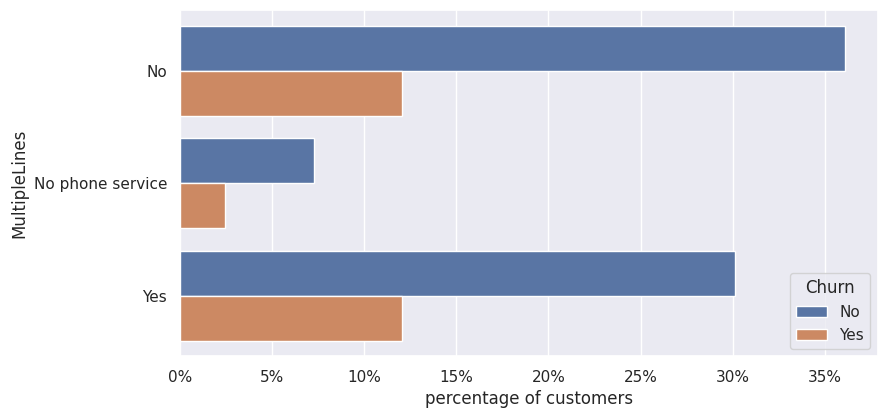

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

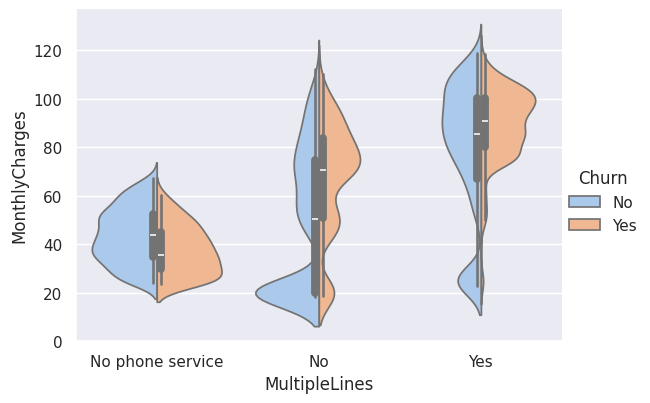

In [ ]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

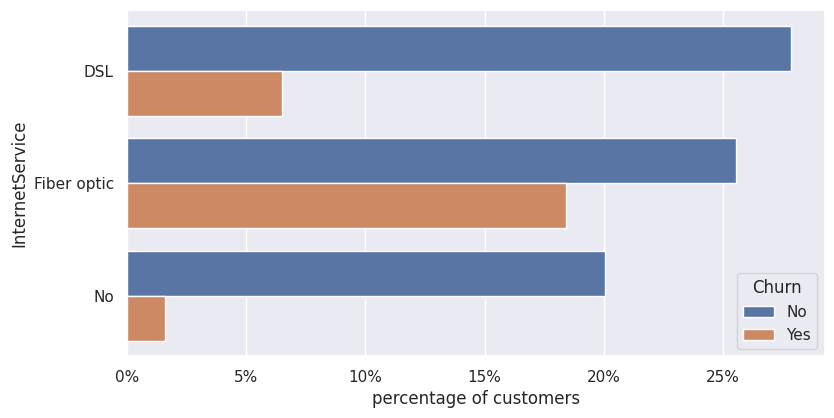

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

# Contract and Payment

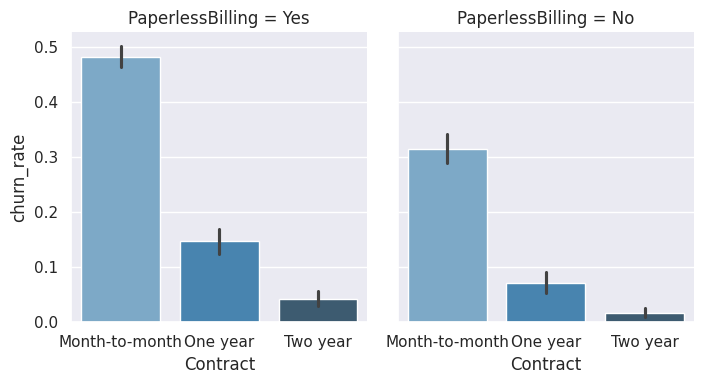

In [ ]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

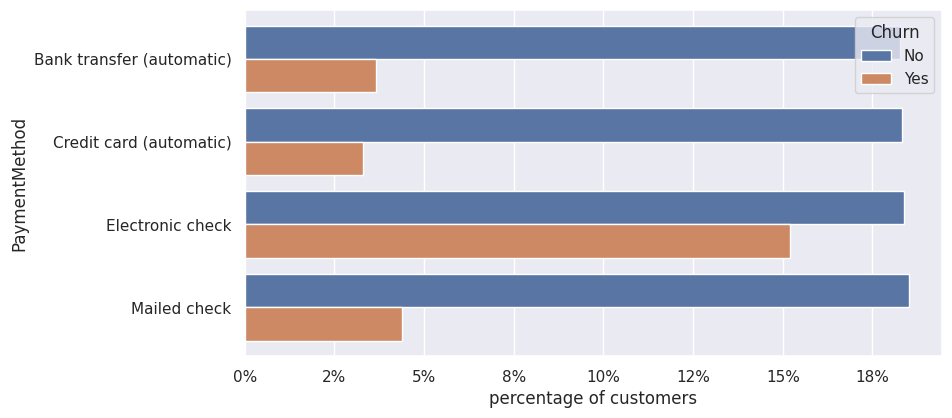

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

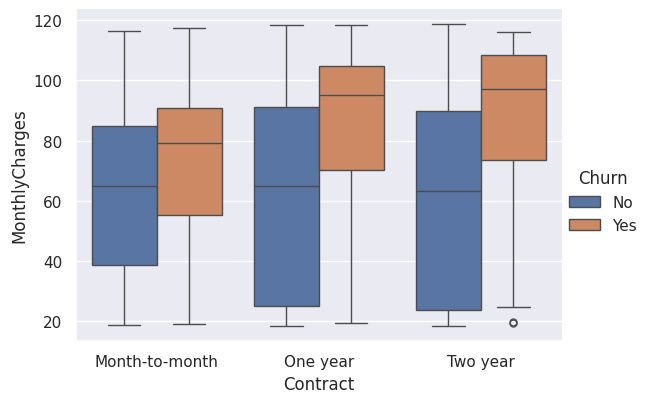

In [ ]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

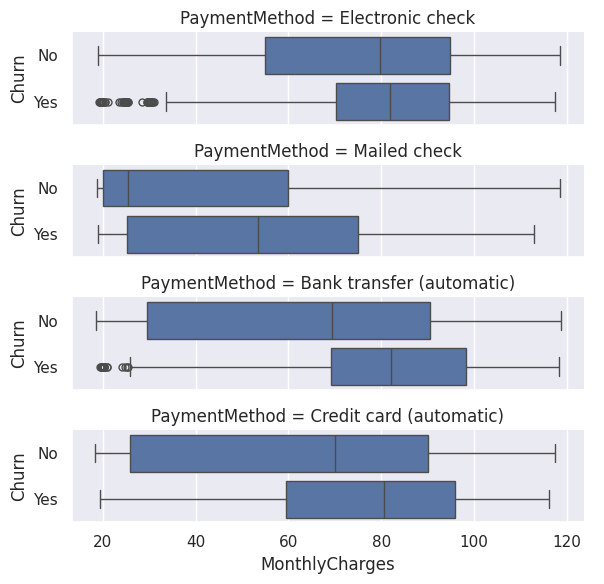

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

In summary:

* Customers opting for paperless billing are more likely to churn.
* The preferred payment method, Electronic check, is chosen by approximately 35% of customers and exhibits a notably high churn rate.
* Short-term contracts tend to have higher churn rates.
* One and two-year contracts possibly involve contractual obligations, leading customers to wait until the contract's end to churn.
* Longer contract durations correlate with higher monthly charges, contributing to a higher churn rate.
* Customers using mailed checks tend to have lower charges.
* A substantial disparity in charges exists between customers who churn and those who don't, particularly concerning payments made through mailed checks.

# correlation Heatmap to show correlation between features

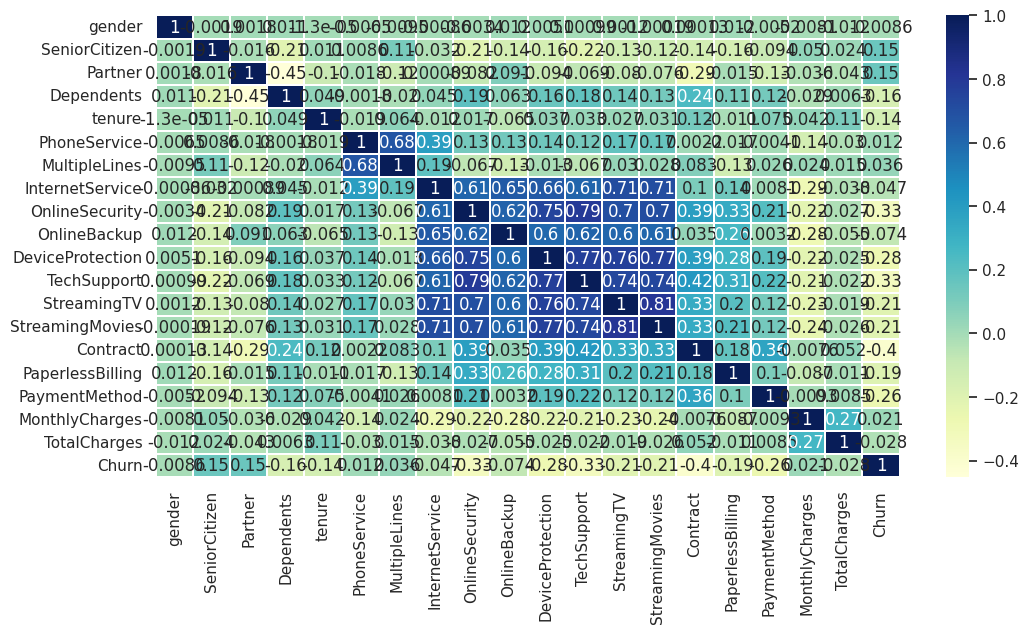

In [ ]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'churn_rate', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'], axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True)

# Feature Engineering

In [ ]:
# reading the data again and performing previous transformation
df = pd.read_csv('Telco-Customer-Churn.csv')
# Check and display rows where "TotalCharges" does not start with a digit
check_total_charges = df["TotalCharges"].str.contains(r"^(?!.\d)", regex=True)
display(df[check_total_charges])

# Convert "TotalCharges" to numeric, replacing errors with NaN and filling NaN with 0
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

# Convert "SeniorCitizen" to "Yes" or "No" without using np.where
df["SeniorCitizen"] = df["SeniorCitizen"].astype(bool).map({True: "Yes", False: "No"})

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Add a prefix to column names based on a condition
df.columns = ["_" + col if col == "customerID" else col for col in df.columns]

# Create a new column 'Relationship' based on 'Partner' and 'Dependents'
df["Relationship"] = np.where(df[['Partner', 'Dependents']].apply(lambda row: "Yes" in row.values, axis=1), "Family", "Single")

# Update 'Contract' column to binary values
df["Contract"] = (df["Contract"] != "Month-to-month").astype(str)

# Simplify 'PaymentMethod' to 'Automatic' or 'Manual'
df["PaymentMethod"] = np.where(df["PaymentMethod"].str.contains("automatic"), "Automatic", "Manual")

# Create binary columns for 'InternetService'
df["DslService"] = (df["InternetService"] == "DSL").astype(str)
df["FiberOpticService"] = (df["InternetService"] == "Fiber optic").astype(str)

# Convert selected columns to binary ('Yes' or 'No')
binary_columns = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df[binary_columns] = df[binary_columns].isin(["Yes", "No"]).astype(str)

# Create a binary column 'ContractUpdate' based on conditions
df["ContractUpdate"] = (df["MonthlyCharges"] * df["tenure"] != df["TotalCharges"]).astype(str)

# Apply LabelEncoder to object columns
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == "object" else col)

# Sample 5 random rows
df.sample(5)

,_customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,DslService,FiberOpticService,ContractUpdate
229,645,0,0,1,1,47,1,1,0,1,1,1,1,1,1,1,1,0,85.30,4107.25,0,0,1,0,1
2535,1342,0,1,1,0,70,1,1,0,1,1,1,1,1,1,1,1,0,92.20,6474.45,0,0,1,0,1
6950,1405,0,0,1,1,5,1,1,0,1,1,1,1,1,1,0,1,1,49.40,232.55,0,0,1,0,1
3365,2716,1,0,0,0,19,1,1,2,0,0,0,0,0,0,1,0,1,19.65,358.15,0,1,0,0,1
4170,618,1,0,1,0,72,1,1,1,1,1,1,1,1,1,1,0,0,115.15,8349.45,0,0,0,1,1


# Modelling

In [ ]:
y = df['Churn']
X = df.drop(columns=['Churn', '_customerID'])

The Evaluation metrics we would use are:
* F1-Score - The F1-score is a metric that combines both precision and recall into a single value.
* AUC - AUC is a metric that assesses the performance of a classification model by measuring the area under the Receiver Operating Characteristic (ROC) curve

why :

The F1-score, balancing precision and recall, and AUC, measuring discrimination ability, are crucial metrics for assessing telecom churn models. F1-score provides a unified measure considering accuracy and capture of actual churn instances, while AUC evaluates the model's ability to distinguish between churners and non-churners, offering a comprehensive assessment of overall performance

In [ ]:
clf_stats_df = pd.DataFrame(columns=["clf_name", "F1-score", "auc-score", "elapsed_time"])
roc_auc_list = []

# Creating Baseline Models


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


CV f1_score: 0.7252429393220449

CV roc_auc_score: 0.8379963316024698


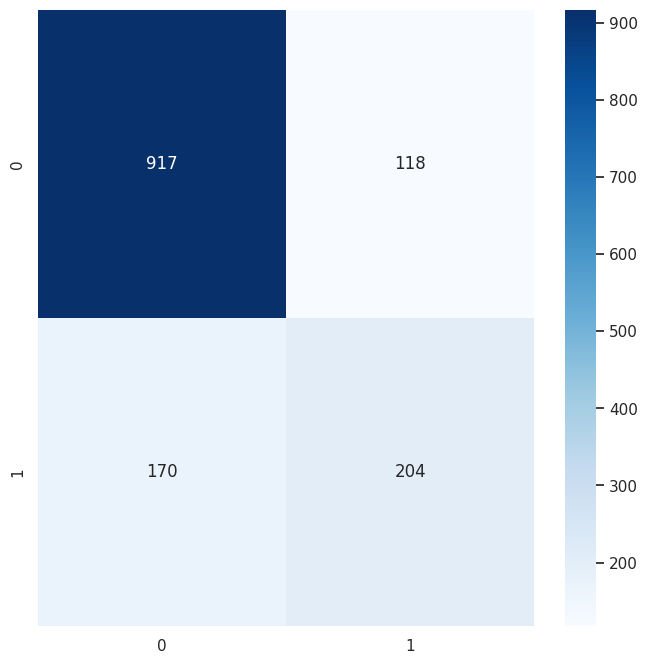

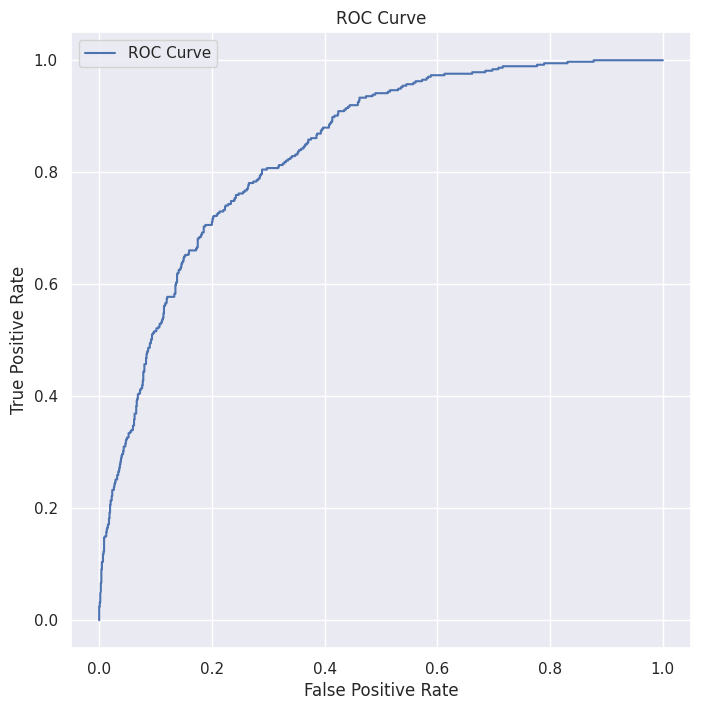


elapsed time in seconds: 2.343806743621826


In [ ]:

# create a 80/20 split of the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#roc_auc_list = []
num_of_folds = 10

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for num_fold, (train_index, valid_index) in enumerate(folds.split(xtrain, ytrain)):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index, :], xtrain.iloc[valid_index, :]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print(f"\nStratified Fold: {num_fold}\n")

    clf_stra_logit = LogisticRegression(random_state=42, max_iter=500)
    clf_stra_logit.fit(xtrain_stra, ytrain_stra)

    predictions_probas = clf_stra_logit.predict_proba(xvalid)
    predictions_probas_list += predictions_probas / num_of_folds

    roc_auc_list.append(roc_auc_score(yvalid, predictions_probas[:, 1], average="macro"))

predictions = np.argmax(predictions_probas_list, axis=1)

print("\n", classification_report(yvalid, predictions))
print("\nCV f1_score:", f1_score(yvalid, predictions, average="macro"))
print("\nCV roc_auc_score:", roc_auc_score(yvalid, predictions_probas_list[:, 1], average="macro"))

# Confusion Matrix
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(confusion_matrix(yvalid, predictions), annot=True, fmt="d", cmap="Blues")
plt.show()

# ROC Curve
sns.set(rc={'figure.figsize': (8, 8)})
fpr, tpr, _ = roc_curve(yvalid, predictions_probas_list[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

elapsed_time = time.time() - start_time
print("\nelapsed time in seconds:", elapsed_time)

SVM


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


               precision    recall  f1-score   support

           0       0.78      0.97      0.87       518
           1       0.75      0.26      0.38       187

    accuracy                           0.78       705
   macro avg       0.77      0.61      0.62       705
weighted avg       0.77      0.78      0.74       705


CV f1_score: 0.6243670701147095

CV roc_auc_score: 0.7084942084942085


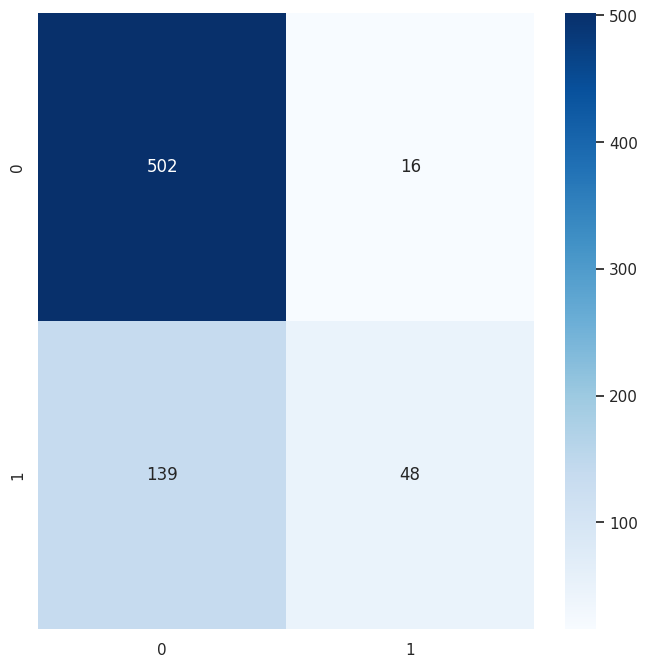

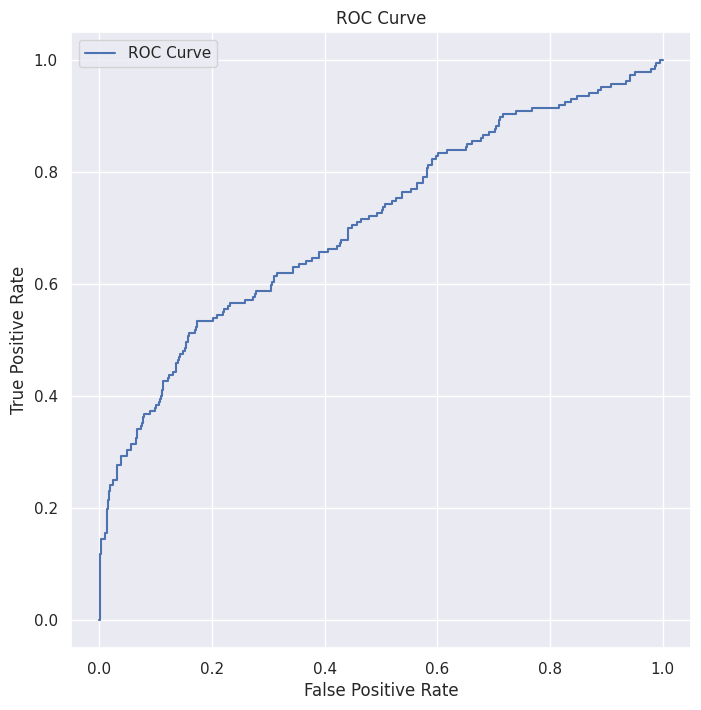


elapsed time in seconds: 151.99379134178162


In [ ]:
from sklearn.svm import SVC

# Create a 90/10 split of the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#roc_auc_list = []
num_of_folds = 10
num_fold = 0

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index, :], xtrain.iloc[valid_index, :]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print(f"\nStratified Fold: {num_fold}\n")
    num_fold += 1

    clf_stra_svc = SVC(random_state=42, gamma='auto', probability=True, max_iter=-1)
    clf_stra_svc.fit(xtrain_stra, ytrain_stra)

    predictions_probas = clf_stra_svc.predict_proba(xvalid)
    predictions_probas_list += predictions_probas / num_of_folds

    roc_auc_list.append(roc_auc_score(yvalid, predictions_probas[:, 1], average="macro"))

predictions = np.argmax(predictions_probas_list, axis=1)

print("\n", classification_report(yvalid, predictions))
print("\nCV f1_score:", f1_score(yvalid, predictions, average="macro"))
print("\nCV roc_auc_score:", roc_auc_score(yvalid, predictions_probas_list[:, 1], average="macro"))

# Confusion Matrix
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(confusion_matrix(yvalid, predictions), annot=True, fmt="d", cmap="Blues")
plt.show()

# ROC Curve
sns.set(rc={'figure.figsize': (8, 8)})
fpr, tpr, _ = roc_curve(yvalid, predictions_probas_list[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


elapsed_time = time.time() - start_time
print("\nelapsed time in seconds:", elapsed_time)

# Random Forest


Stratified Fold: 0


Stratified Fold: 1


Stratified Fold: 2


Stratified Fold: 3


Stratified Fold: 4


Stratified Fold: 5


Stratified Fold: 6


Stratified Fold: 7


Stratified Fold: 8


Stratified Fold: 9


               precision    recall  f1-score   support

           0       0.83      0.91      0.87       518
           1       0.66      0.48      0.56       187

    accuracy                           0.80       705
   macro avg       0.74      0.70      0.71       705
weighted avg       0.78      0.80      0.78       705


CV f1_score: 0.7114794352363412

CV roc_auc_score: 0.8300332417979477


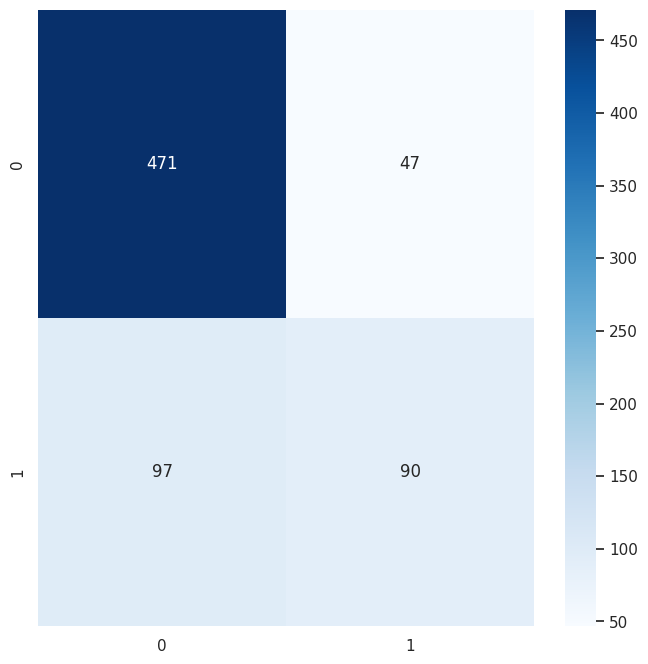

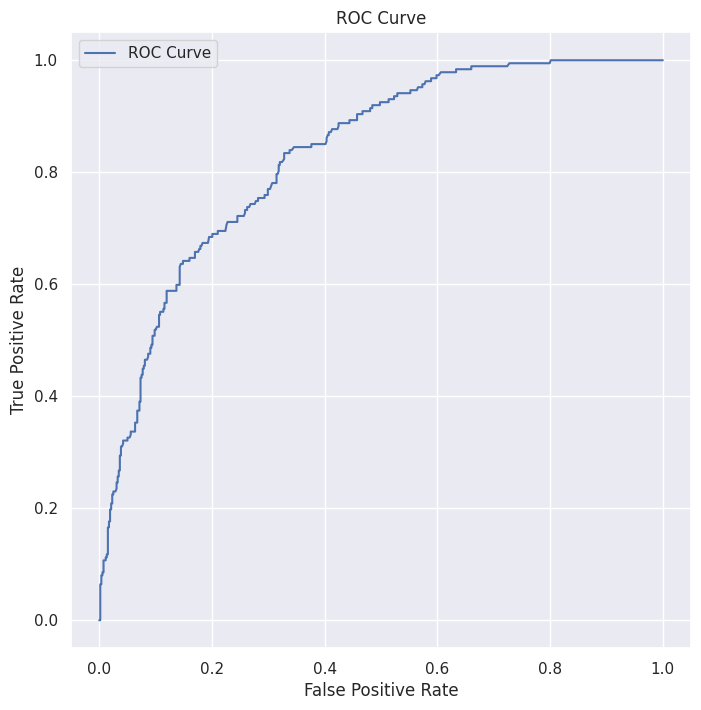


elapsed time in seconds: 9.070833921432495


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a 90/10 split of the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.1, stratify=y)

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#roc_auc_list = []
num_of_folds = 10
num_fold = 0

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index, :], xtrain.iloc[valid_index, :]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print(f"\nStratified Fold: {num_fold}\n")
    num_fold += 1

    clf_stra_rf = RandomForestClassifier()

    clf_stra_rf.fit(xtrain_stra, ytrain_stra)

    predictions_probas = clf_stra_rf.predict_proba(xvalid)
    predictions_probas_list += predictions_probas / num_of_folds

    roc_auc_list.append(roc_auc_score(yvalid, predictions_probas[:, 1], average="macro"))

predictions = np.argmax(predictions_probas_list, axis=1)

print("\n", classification_report(yvalid, predictions))
print("\nCV f1_score:", f1_score(yvalid, predictions, average="macro"))
print("\nCV roc_auc_score:", roc_auc_score(yvalid, predictions_probas_list[:, 1], average="macro"))

# Confusion Matrix
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(confusion_matrix(yvalid, predictions), annot=True, fmt="d", cmap="Blues")
plt.show()

# ROC Curve
sns.set(rc={'figure.figsize': (8, 8)})
fpr, tpr, _ = roc_curve(yvalid, predictions_probas_list[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


elapsed_time = time.time() - start_time
print("\nelapsed time in seconds:", elapsed_time)

# Boosting Algorithim (Slow Learner)
-- XGBoost Classifier


Stratified Fold: 0

[0]	validation_0-auc:0.85687	validation_1-auc:0.84455
[99]	validation_0-auc:0.97434	validation_1-auc:0.83223

Stratified Fold: 1

[0]	validation_0-auc:0.85571	validation_1-auc:0.84448
[99]	validation_0-auc:0.97090	validation_1-auc:0.83680

Stratified Fold: 2

[0]	validation_0-auc:0.85510	validation_1-auc:0.85110
[99]	validation_0-auc:0.97651	validation_1-auc:0.83304

Stratified Fold: 3

[0]	validation_0-auc:0.85642	validation_1-auc:0.82842
[99]	validation_0-auc:0.97530	validation_1-auc:0.82391

Stratified Fold: 4

[0]	validation_0-auc:0.85880	validation_1-auc:0.83105
[99]	validation_0-auc:0.97643	validation_1-auc:0.81452

Stratified Fold: 5

[0]	validation_0-auc:0.85707	validation_1-auc:0.82858
[99]	validation_0-auc:0.97699	validation_1-auc:0.82709

Stratified Fold: 6

[0]	validation_0-auc:0.85579	validation_1-auc:0.85312
[99]	validation_0-auc:0.97115	validation_1-auc:0.85204

Stratified Fold: 7

[0]	validation_0-auc:0.86027	validation_1-auc:0.80379
[99]	validation

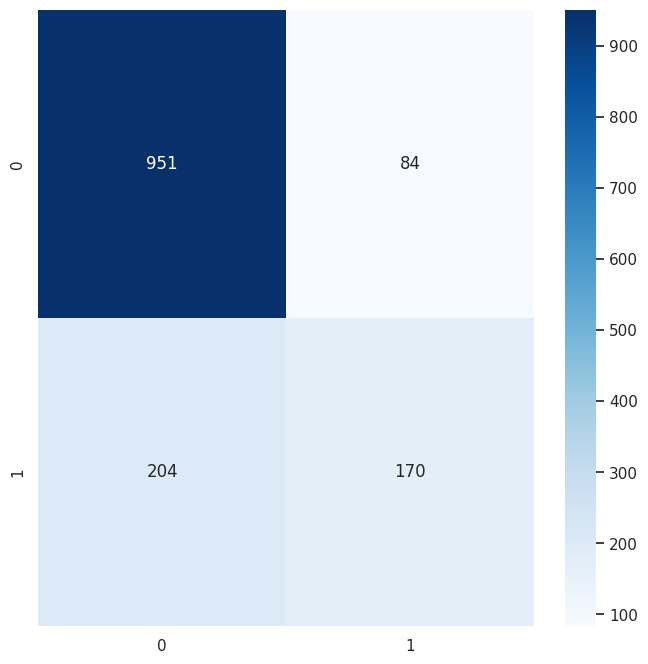

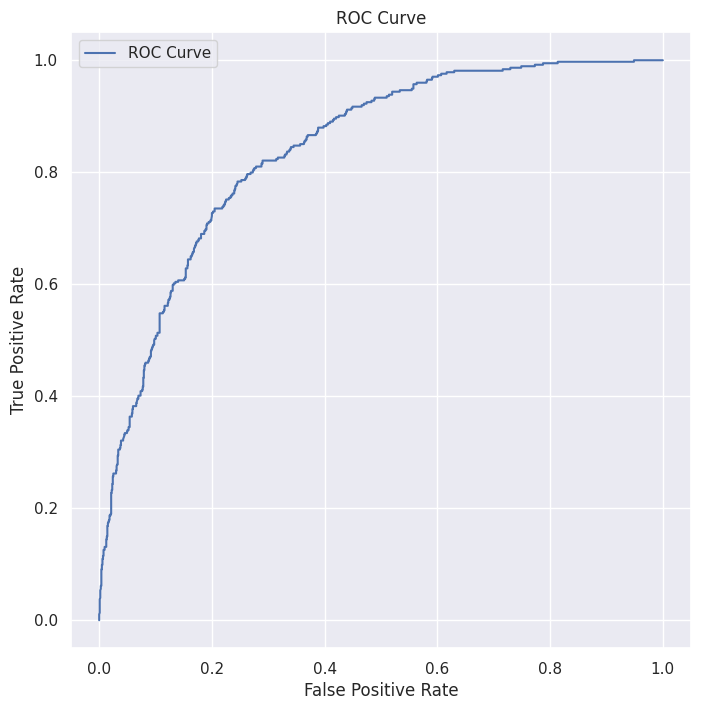


elapsed time in seconds: 3.768014907836914


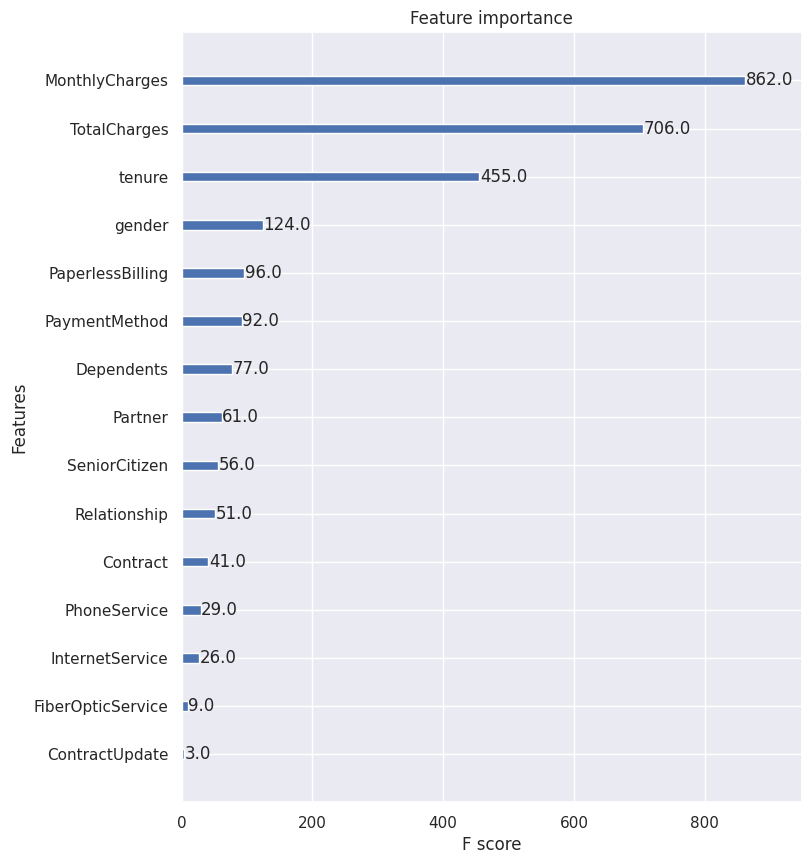

In [ ]:
import xgboost as xgb

# Create a 90/10 split of the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

start_time = time.time()

predictions_probas_list = np.zeros([len(yvalid), 2])
#roc_auc_list = []
num_of_folds = 10
num_fold = 0

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index, :], xtrain.iloc[valid_index, :]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print(f"\nStratified Fold: {num_fold}\n")
    num_fold += 1

    clf_stra_xgb = xgb.XGBClassifier(
        objective='binary:logistic',
        nthread=-1,
        seed=42,
        early_stopping_rounds=200,
        eval_metric='auc'
    )

    clf_stra_xgb.fit(
        xtrain_stra, ytrain_stra,
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)],
        verbose=250
    )

    predictions_probas = clf_stra_xgb.predict_proba(xvalid)
    predictions_probas_list += predictions_probas / num_of_folds

    roc_auc_list.append(roc_auc_score(yvalid, predictions_probas[:, 1], average="macro"))

predictions = np.argmax(predictions_probas_list, axis=1)

print("\n", classification_report(yvalid, predictions))
print("\nCV f1_score:", f1_score(yvalid, predictions, average="macro"))
print("\nCV roc_auc_score:", roc_auc_score(yvalid, predictions_probas_list[:, 1], average="macro"))

# Confusion Matrix
sns.set(rc={'figure.figsize': (8, 8)})
sns.heatmap(confusion_matrix(yvalid, predictions), annot=True, fmt="d", cmap="Blues")
plt.show()

# ROC Curve
sns.set(rc={'figure.figsize': (8, 8)})
fpr, tpr, _ = roc_curve(yvalid, predictions_probas_list[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Other Plots
# You can use Matplotlib for these plots instead of scikitplot where applicable
# If you prefer scikitplot, you can leave this section unchanged

# Feature Importance Plot
sns.set(rc={'figure.figsize': (8, 10)})
xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

elapsed_time = time.time() - start_time
print("\nelapsed time in seconds:", elapsed_time)

# Inspecting the Base Model Performances

Text(0.5, 1.0, 'ROC AUC Baseline Comparison')

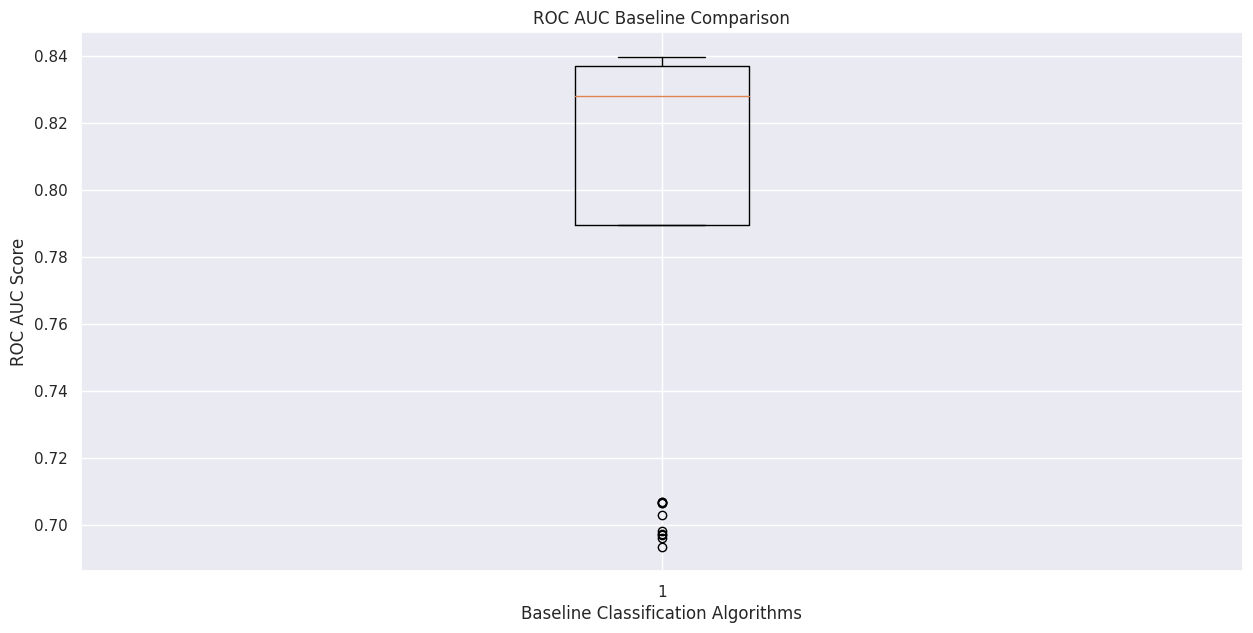

In [ ]:
#roc_auc_score_list
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

plt.boxplot(roc_auc_list)
#ax.set_xticklabels(["logistic", "smv", "random forest", "xgboost"])

plt.ylabel('ROC AUC Score')
plt.xlabel('Baseline Classification Algorithms')
plt.title('ROC AUC Baseline Comparison')

In [ ]:
roc_auc_list

[0.8386137590741171,
 0.8381461675579323,
 0.8369087292360948,
 0.8358572941693145,
 0.8386731767805937,
 0.8378258286186675,
 0.836327469064042,
 0.837647575499238,
 0.8373272365599731,
 0.8380118318737245,
 0.7070592364710011,
 0.697179608944315,
 0.6974686680569033,
 0.7067598538186773,
 0.7067288831994715,
 0.6963846963846964,
 0.6936283112753701,
 0.7068630892160306,
 0.6983151983151983,
 0.7030175706646296,
 0.8259296347531643,
 0.8181508475626122,
 0.825176016352487,
 0.8230545289368819,
 0.8216660128424834,
 0.827534945182004,
 0.8236997501703385,
 0.8171701112877584,
 0.8193948341007165,
 0.8256405756405756,
 0.8388204293575139,
 0.833071120411274,
 0.8330401198687645,
 0.8332325815701775,
 0.8392182696530524,
 0.82947247410163,
 0.8320636027797153,
 0.8336278384871735,
 0.8396690692087112,
 0.8286354594538738]